# Programming Assignment #3

<font color="red"> <b> Due: May 9  EOD</b> </font>

<font color="blue"> Vaibhav Rao <br>
50375332
</font>

# I. Introduction

I am going to use the sensor data that has values from ECG, TEB and EDA readings by sensors placed on individuals. I would be using models for for SVM and compare Linear/Non linear SVM performance for this multiclass data.
We would be seeing the Accuracy and Confusion Matrix for those.

# II. Data

You may choose one of the following three datasets to work on. Introduce your data and visualize them. Describe your observations about the data. 
1. https://archive.ics.uci.edu/ml/datasets/covertype
2. https://archive.ics.uci.edu/ml/datasets/cnae-9
3. https://archive.ics.uci.edu/ml/datasets/Activity+recognition+using+wearable+physiological+measurements (DL Link - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6960825/bin/sensors-19-05524-s001.zip )


### Have Picked the sensor data for this classification.

Below we read the dataset and explore relevant information in the datasets.

### About the Dataset.

Here we have a dataset of 40 individuals. Each individual spends 280 seconds on 4 activities. Hence the dataset is well balanced. The readings are taken for a 10 second window. The above data plotted is of individual 1 on activity 1.

Hence for each activity we have 1120 recordings (40*28) and we have 4480 recording for all 4 activities of 40 individuals.

#### About the activities:

In order to elicit the different activities, we have used a segment documentary called Earth to induce Neutral Activity. In order to elicit emotional activity, we used a set of segments extracted from several validated movies. American History X (1998) by Savoy Pictures, I am legend (2007) by Warner Bross, Life is beautiful (1997) by Miramax, and Cannibal Holocaust (1980) by F.D. Cinematografica. The mental activity was elicited using a set of games based on mental arithmetic and playing the well-known game Tetris, used several times to elicit mental activity.

-Neutral activity, registered during the last 140 s of the first movie (the documentary). As each individual watched each movie twice, there are 280 s for each individual in the database
-Emotional activity, registered during the viewing of the last 70 s of the second and third movies (140 s); therefore, we obtained a total of 280 s per individual.
-Mental activity, registered during the last 140 s of both games, producing 280 s in total.
-Physical activity registered during the last 280 s of the physical activity stage. To elicit physical load the participant had to go up and down the stairs for five minutes.


In [1]:
import pandas as pd
import numpy as np

## READ label information that is in a different text file
with open("sensors-data/labels.txt") as f:
    content = f.read().splitlines()

## Read our "," separated features from the data file
data = pd.read_csv("sensors-data/data.txt", sep=",", header=None)
data.columns = content


In [2]:
#Print the Headers for all the features for the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4480 entries, 0 to 4479
Columns: 535 entries, Subject index (1-40) to Activity: 1-neutral, 2-emotional, 3-mental and 4-physical
dtypes: float64(520), int64(14), object(1)
memory usage: 18.3+ MB


In [3]:
# Modify the target values in Dataset so that we can print them

from sklearn.preprocessing import LabelEncoder
le_Y = LabelEncoder()
(data['Activity: 1-neutral, 2-emotional, 3-mental and 4-physical']) = le_Y.fit_transform(data['Activity: 1-neutral, 2-emotional, 3-mental and 4-physical'])

In [4]:
#Lets just see the values for 533 features for individual 1
data.head(28)

,Subject index (1-40),ECG_original_mean,ECG_original_std,ECG_original_trimmean25,ECG_original_median,ECG_original_skewness,ECG_original_kurtosis,ECG_original_max,ECG_original_min,ECG_original_prctile25,...,EDA_Functionals_power_Filt2kurtosis,EDA_Functionals_power_Filt2max,EDA_Functionals_power_Filt2min,EDA_Functionals_power_Filt2prctile25,EDA_Functionals_power_Filt2prctile75,EDA_Functionals_power_Filt2geomean(abs),EDA_Functionals_power_Filt2harmmean,EDA_Functionals_power_Filt2mad,EDA_Functionals_power_Filt2baseline,"Activity: 1-neutral, 2-emotional, 3-mental and 4-physical"
0,1,-0.004125,0.254095,0.001426,-0.01037,-0.538509,5.95534,1.04063,-1.37437,-0.10937,...,1015.36,717032000.0,0.027384,2.534250,17.38820,8.05589,1.802470,1413310.0,3028080.0,0
1,1,0.031029,0.193761,0.012918,-0.00237,0.781415,5.18794,0.98963,-0.71937,-0.08737,...,1015.78,705854000.0,0.016947,2.515130,16.59140,7.81769,1.523490,1390180.0,3016420.0,0
2,1,0.015678,0.182336,-0.003028,-0.02337,0.881194,5.66530,0.87563,-0.71937,-0.08037,...,1016.16,627018000.0,0.008129,2.259590,15.23120,7.11684,1.258600,1234110.0,3004430.0,0
3,1,0.014525,0.176636,-0.006161,-0.02737,1.024900,6.10968,0.91063,-0.71937,-0.08037,...,1015.61,559748000.0,0.007377,2.139240,14.46630,6.70236,1.266430,1102720.0,2992170.0,0
4,1,0.010349,0.179248,-0.008526,-0.02737,0.935697,5.83902,0.91063,-0.75637,-0.08337,...,1015.67,484473000.0,0.011448,1.935950,12.54930,6.08647,1.223870,954322.0,2979610.0,0
5,1,0.007740,0.177649,-0.012168,-0.02737,0.984125,5.96674,0.91063,-0.75637,-0.08737,...,1015.64,420099000.0,0.008836,1.753610,11.45940,5.51315,1.169720,827561.0,2966780.0,0
6,1,-0.012270,0.180457,-0.032297,-0.05237,0.937233,5.73374,0.91063,-0.76237,-0.11437,...,1015.79,362617000.0,0.005280,1.726440,10.52020,5.12044,1.015240,714134.0,2953740.0,0
7,1,-0.007162,0.184272,-0.026226,-0.03537,0.849528,5.46290,0.81163,-0.76237,-0.11637,...,1016.08,340513000.0,0.006560,1.619530,9.61980,4.79998,1.015360,670280.0,2940650.0,0
8,1,-0.015890,0.181058,-0.035534,-0.04337,0.898922,5.52209,0.81163,-0.76237,-0.12237,...,1016.01,366238000.0,0.009397,1.656320,9.91313,4.98051,1.081940,721015.0,2927750.0,0
9,1,-0.013506,0.180362,-0.031537,-0.04537,0.860308,5.60047,0.81363,-0.78937,-0.11137,...,1015.62,407162000.0,0.002714,1.762480,10.92700,5.31570,0.955554,802111.0,2915120.0,0


**JUST Taking ECG parameters our of the original dataset and Checking Correlation with different activities.**

In [5]:
data_ECG = data.iloc[:,1:175]
data_target = data['Activity: 1-neutral, 2-emotional, 3-mental and 4-physical']
data_corr = data_ECG.join(data_target)
data_corr.corr()

,ECG_original_mean,ECG_original_std,ECG_original_trimmean25,ECG_original_median,ECG_original_skewness,ECG_original_kurtosis,ECG_original_max,ECG_original_min,ECG_original_prctile25,ECG_original_prctile75,...,ECG_LF_HF,ECG_MF_HF,ECG_HF_TF,ECG_LF_MF_HF,ECG_CCV_LF,ECG_CCV_HF,ECG_RMSSDD,ECG_A1_DFA,ECG_A2_DFA,"Activity: 1-neutral, 2-emotional, 3-mental and 4-physical"
ECG_original_mean,1.000000,0.261175,0.991501,0.913595,-0.254409,-0.012629,0.320761,-0.117415,0.462106,0.712081,...,0.100737,-0.135457,-0.143579,-0.135147,0.411004,0.425385,0.294660,-0.143723,-0.036357,0.249629
ECG_original_std,0.261175,1.000000,0.268125,0.290984,-0.276402,-0.246734,0.836362,-0.833158,-0.648999,0.828461,...,0.297660,-0.324248,-0.483650,-0.320684,0.530557,0.565214,0.591456,-0.329651,-0.060131,0.450912
ECG_original_trimmean25,0.991501,0.268125,1.000000,0.943688,-0.295331,-0.016901,0.298215,-0.143808,0.460076,0.706961,...,0.093552,-0.127450,-0.134620,-0.127110,0.422744,0.434142,0.302640,-0.141955,-0.033639,0.256437
ECG_original_median,0.913595,0.290984,0.943688,1.000000,-0.284797,-0.026138,0.272096,-0.161065,0.340827,0.653806,...,0.067346,-0.100769,-0.105880,-0.100401,0.432696,0.434479,0.315186,-0.126727,-0.027003,0.263114
ECG_original_skewness,-0.254409,-0.276402,-0.295331,-0.284797,1.000000,0.260327,-0.134186,0.475423,-0.009487,-0.325600,...,-0.107203,0.116956,0.214668,0.114754,-0.265341,-0.275289,-0.229251,0.122894,0.001541,-0.280015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ECG_CCV_HF,0.425385,0.565214,0.434142,0.434479,-0.275289,0.021045,0.573014,-0.511769,-0.151638,0.605738,...,0.175522,-0.254784,-0.286762,-0.253982,0.986643,1.000000,0.664831,-0.346257,-0.191642,0.328049
ECG_RMSSDD,0.294660,0.591456,0.302640,0.315186,-0.229251,-0.006923,0.595118,-0.551273,-0.265141,0.549733,...,0.273992,-0.340326,-0.405924,-0.338152,0.631777,0.664831,1.000000,-0.431698,-0.197941,0.316596
ECG_A1_DFA,-0.143723,-0.329651,-0.141955,-0.126727,0.122894,0.007287,-0.385961,0.355843,0.150204,-0.297461,...,-0.388138,0.511548,0.478467,0.510996,-0.298030,-0.346257,-0.431698,1.000000,0.172913,-0.266789
ECG_A2_DFA,-0.036357,-0.060131,-0.033639,-0.027003,0.001541,-0.047234,-0.051798,0.040688,0.025028,-0.060818,...,0.001313,0.038911,-0.068003,0.041044,-0.186329,-0.191642,-0.197941,0.172913,1.000000,0.105989


#### A Scatter Plot with 2 columns and class target variable

Just plotting 2 columns of the ECG dataset to get the idea of the points

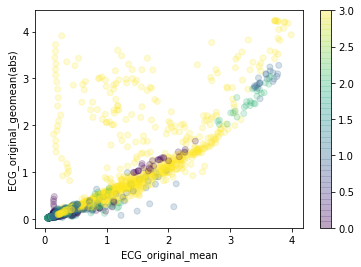

In [6]:
import matplotlib.pyplot as plt

plt.scatter(data_corr.iloc[:,1], data_corr.iloc[:,10], alpha=0.2, c=data_corr.iloc[:,-1])
plt.xlabel(data_corr.columns[0])
plt.ylabel(data_corr.columns[10]);
plt.colorbar()

# III. Method

In the earlier assignment you had to implement Least Mean Square Classifier, Fisher Linear Discriminant, Perceptron,logistic regression, and Neural Network. In this assignment your tasks are the followings:

1. Implement both SVM and Kernel SVM and report the classification performance of the classifiers on the original dataset.
2. Use PCA to reduce the feature representation to a more compact version that may be of size: 10%, 15%, 20%, 25%, and 30% of the originial dataset dimension.
3. Compare the performance of the classifier using the PCA reduced descriptor and the original feature descriptor.

Do not forget to explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 

Each implementation will be followed by a separate markdown cell that should include
 - your implementation description
 - Review of the classification model implemented.
 - Plots or metrics to show the performance of the algorithm


### Grading Rubric (100 Points)
1. Loading dataset, preprocessing, splitting and visualization- 15 Points
2. SVM - 20 Points
3. Kernel SVM - 20 Points
4. PCA Dimensionality Reduction - 25 Points
5. SVM and Kernel SVM using PCA reduced features - 10 Points
6. Results Comparison - 10 Points


### Method

In [7]:
import numpy as np
##your method implementation goes here

SVM Does not require 1-hot encoding since we are training in 1-vs-all mode. We need to pass a 1-d Vector for our target variables.

However SVM is sensitive to normalization, Hence we are normalizing our data for better model predictions.

In [8]:
import numpy as np

#Apply Features from 1:534 (533 Features) to our X
X = np.array(data.iloc[:,1:534])

#Take our target Variable (Last Column as Y)
Y = np.array(data.iloc[:,534])

# Normalize X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

#Use train test split to load 20% of data for test and rest for train
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)



In [9]:
print("Shape of our training and test data", X_train.shape, X_test.shape)

Shape of our training and test data (3584, 533) (896, 533)


Just Plotting random features for all our 4 classes to get an idea of how the features are separable. We have 533 features for this dataset

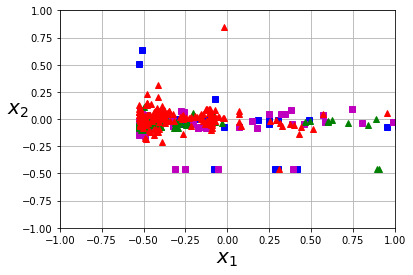

In [10]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 500][y==0], X[:, 200][y==0], "bs")
    plt.plot(X[:, 500][y==1], X[:, 200][y==1], "ms")
    plt.plot(X[:, 500][y==2], X[:, 200][y==2], "g^")
    plt.plot(X[:, 500][y==3], X[:, 200][y==3], "r^")

    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

#Let's have a look at the data we have generated
plot_dataset(X_test, Y_test, [-1.0, 1.0, -1, 1.0])
plt.show()

#### Training a Linear SVM.

Default value of C is 1. However if we decrease C, We apply more regularization. A higher value of C means more accuracy on training samples but was not performing good with test samples (for inf). Hence have selected a C-5 for all my models.

In [11]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=5)
svm_clf.fit(X_train, Y_train)

SVC(C=5, kernel='linear')

#### Training Kernel SVM
I chose 2 Kernel SVM's to compare performance, Namely Polynomial and Gaussion kernels

In [12]:
svm_clf_poly = SVC(kernel='poly', degree=2, C=5)
svm_clf_poly.fit(X_train, Y_train)


SVC(C=5, degree=2, kernel='poly')

In [13]:
svm_clf_gaussian = SVC(kernel='rbf', C=5)
svm_clf_gaussian.fit(X_train, Y_train)

SVC(C=5)

In [14]:
svm_clf_gaussian.kernel

'rbf'

#### Doing PCA for our original dataset 

Reducing the dimension of the original to 10%, 15%, 20%, 25%, and 30% of the originial dataset dimension.

In [15]:
from sklearn.decomposition import PCA

In [16]:
# Reduce to 10%
reduced_comp = int(.10*X_train.shape[1])
pca = PCA(n_components=reduced_comp) # n_components 
x_reduced_10 = pca.fit_transform(X_train)
x_test_reduced_10 = pca.fit_transform(X_test)
print(x_reduced_10.shape, x_test_reduced_10.shape)

(3584, 53) (896, 53)


In [17]:
# Reduce to 15%
reduced_comp = int(.15*X_train.shape[1])
pca = PCA(n_components=reduced_comp) # n_components 
x_reduced_15 = pca.fit_transform(X_train)
x_test_reduced_15 = pca.fit_transform(X_test)
print(x_reduced_15.shape, x_test_reduced_15.shape)

(3584, 79) (896, 79)


In [18]:
# Reduce to 20%
reduced_comp = int(.20*X_train.shape[1])
pca = PCA(n_components=reduced_comp) # n_components 
x_reduced_20 = pca.fit_transform(X_train)
x_test_reduced_20 = pca.fit_transform(X_test)
print(x_reduced_20.shape, x_test_reduced_20.shape)

(3584, 106) (896, 106)


In [19]:
# Reduce to 25%
reduced_comp = int(.25*X_train.shape[1])
pca = PCA(n_components=reduced_comp) # n_components 
x_reduced_25 = pca.fit_transform(X_train)
x_test_reduced_25 = pca.fit_transform(X_test)
print(x_reduced_25.shape, x_test_reduced_25.shape)

(3584, 133) (896, 133)


In [20]:
# Reduce to 30%
reduced_comp = int(.30*X_train.shape[1])
pca = PCA(n_components=reduced_comp) # n_components 
x_reduced_30 = pca.fit_transform(X_train)
x_test_reduced_30 = pca.fit_transform(X_test)
print(x_reduced_30.shape, x_test_reduced_30.shape)

(3584, 159) (896, 159)


#### Training SVM (Linear and Gaussian only) on the Reduced Feature dataset.

In [21]:
svm_clf_10 = SVC(kernel="linear", C=5)
svm_clf_10.fit(x_reduced_10, Y_train)

svm_clf_gaussian_10 = SVC(kernel='rbf', C=5)
svm_clf_gaussian_10.fit(x_reduced_10, Y_train)

SVC(C=5)

In [22]:
svm_clf_15 = SVC(kernel="linear", C=5)
svm_clf_15.fit(x_reduced_15, Y_train)

svm_clf_gaussian_15 = SVC(kernel='rbf', C=5)
svm_clf_gaussian_15.fit(x_reduced_15, Y_train)

SVC(C=5)

In [23]:
svm_clf_20 = SVC(kernel="linear", C=5)
svm_clf_20.fit(x_reduced_20, Y_train)

svm_clf_gaussian_20 = SVC(kernel='rbf', C=5)
svm_clf_gaussian_20.fit(x_reduced_20, Y_train)

SVC(C=5)

In [24]:
svm_clf_25 = SVC(kernel="linear", C=5)
svm_clf_25.fit(x_reduced_25, Y_train)

svm_clf_gaussian_25 = SVC(kernel='rbf', C=5)
svm_clf_gaussian_25.fit(x_reduced_25, Y_train)

SVC(C=5)

In [25]:
svm_clf_30 = SVC(kernel="linear", C=5)
svm_clf_30.fit(x_reduced_30, Y_train)

svm_clf_gaussian_30 = SVC(kernel='rbf', C=5)
svm_clf_gaussian_30.fit(x_reduced_30, Y_train)

SVC(C=5)

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

In [26]:
from sklearn import metrics
import seaborn as sn

#### Performance and accuracy Score with Confusion Matrix for our SVM Classifier

Accuracy Score for Linear SVM: 87.61%


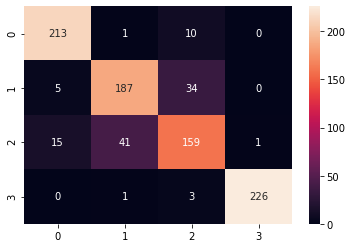

In [27]:
y_pred = svm_clf.predict(X_test)
# evaluation: accuracy
confusion_mat = metrics.confusion_matrix(y_true = Y_test, y_pred = y_pred)
# acuracy percentage
test_acc_predict = metrics.accuracy_score(y_true=Y_test, y_pred=y_pred)

print("Accuracy Score for Linear SVM: {:.2f}%".format(test_acc_predict*100))

#Plot confusion Matrix as a heat map
sn.heatmap(confusion_mat, annot=True, fmt="d")

#### Performance and accuracy Score with Confusion Matrix for our SVM Kernel Classifier (Polynomial and Gaussian)

Accuracy Score for Polynomial Kernel SVM: 84.04%


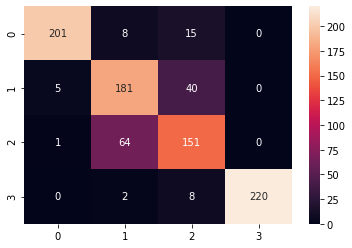

In [28]:
y_pred = svm_clf_poly.predict(X_test)
# evaluation: accuracy
confusion_mat = metrics.confusion_matrix(y_true = Y_test, y_pred = y_pred)
# acuracy percentage
test_acc_predict = metrics.accuracy_score(y_true=Y_test, y_pred=y_pred)

print("Accuracy Score for Polynomial Kernel SVM: {:.2f}%".format(test_acc_predict*100))

#Plot confusion Matrix as a heat map
sn.heatmap(confusion_mat, annot=True, fmt="d")

Accuracy Score for Gaussian Kernel SVM: 89.51%


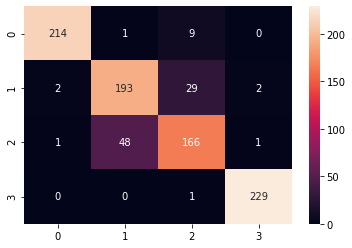

In [29]:
y_pred = svm_clf_gaussian.predict(X_test)
# evaluation: accuracy
confusion_mat = metrics.confusion_matrix(y_true = Y_test, y_pred = y_pred)
# acuracy percentage
test_acc_predict = metrics.accuracy_score(y_true=Y_test, y_pred=y_pred)

print("Accuracy Score for Gaussian Kernel SVM: {:.2f}%".format(test_acc_predict*100))

#Plot confusion Matrix as a heat map
sn.heatmap(confusion_mat, annot=True, fmt="d")

#### Performance and accuracy Score with Confusion Matrix for our SVM Classifiers On PCA Reduced dataset.

We will be using SVM classifier and Gaussian Kernel Classifier for the below task.

##### SVM and Kernel SVM models trained on 10% of the original dataset:

Accuracy Score for Linear SVM with 10% of the orginal features: 23.21%


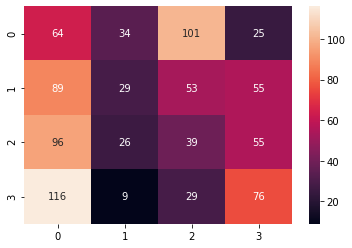

In [30]:
y_pred = svm_clf_10.predict(x_test_reduced_10)
# evaluation: accuracy
confusion_mat = metrics.confusion_matrix(y_true = Y_test, y_pred = y_pred)
# acuracy percentage
test_acc_predict = metrics.accuracy_score(y_true=Y_test, y_pred=y_pred)

print("Accuracy Score for Linear SVM with 10% of the orginal features: {:.2f}%".format(test_acc_predict*100))
sn.heatmap(confusion_mat, annot=True, fmt="d")

Accuracy Score for Gaussian SVM with 10% of the original features: 38.17%


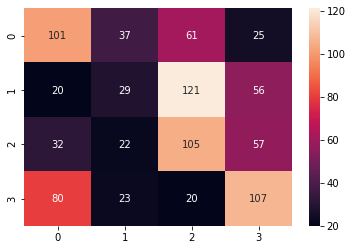

In [31]:
y_pred = svm_clf_gaussian_10.predict(x_test_reduced_10)
# evaluation: accuracy
confusion_mat = metrics.confusion_matrix(y_true = Y_test, y_pred = y_pred)
# acuracy percentage
test_acc_predict = metrics.accuracy_score(y_true=Y_test, y_pred=y_pred)

print("Accuracy Score for Gaussian SVM with 10% of the original features: {:.2f}%".format(test_acc_predict*100))
sn.heatmap(confusion_mat, annot=True, fmt="d")

##### SVM and Kernel SVM models trained on 15% of the original dataset:

In [32]:
y_pred = svm_clf_15.predict(x_test_reduced_15)
# evaluation: accuracy
# acuracy percentage
test_acc_predict = metrics.accuracy_score(y_true=Y_test, y_pred=y_pred)

print("Accuracy Score for Linear SVM with 15% of the orginal features: {:.2f}%".format(test_acc_predict*100))

y_pred = svm_clf_gaussian_15.predict(x_test_reduced_15)
# evaluation: accuracy
# acuracy percentage
test_acc_predict = metrics.accuracy_score(y_true=Y_test, y_pred=y_pred)

print("Accuracy Score for Gaussian SVM with 15% of the original features: {:.2f}%".format(test_acc_predict*100))

Accuracy Score for Linear SVM with 15% of the orginal features: 35.27%
Accuracy Score for Gaussian SVM with 15% of the original features: 38.28%


##### SVM and Kernel SVM models trained on 20% of the original dataset:

In [33]:
y_pred = svm_clf_20.predict(x_test_reduced_20)
# evaluation: accuracy
# acuracy percentage
test_acc_predict = metrics.accuracy_score(y_true=Y_test, y_pred=y_pred)

print("Accuracy Score for Linear SVM with 20% of the orginal features: {:.2f}%".format(test_acc_predict*100))

y_pred = svm_clf_gaussian_20.predict(x_test_reduced_20)
# evaluation: accuracy
# acuracy percentage
test_acc_predict = metrics.accuracy_score(y_true=Y_test, y_pred=y_pred)

print("Accuracy Score for Gaussian SVM with 20% of the original features: {:.2f}%".format(test_acc_predict*100))


Accuracy Score for Linear SVM with 20% of the orginal features: 31.47%
Accuracy Score for Gaussian SVM with 20% of the original features: 37.28%


##### SVM and Kernel SVM models trained on 25% of the original dataset:

In [34]:
y_pred = svm_clf_25.predict(x_test_reduced_25)
# evaluation: accuracy
# acuracy percentage
test_acc_predict = metrics.accuracy_score(y_true=Y_test, y_pred=y_pred)

print("Accuracy Score for Linear SVM with 25% of the orginal features: {:.2f}%".format(test_acc_predict*100))

y_pred = svm_clf_gaussian_25.predict(x_test_reduced_25)
# evaluation: accuracy
# acuracy percentage
test_acc_predict = metrics.accuracy_score(y_true=Y_test, y_pred=y_pred)

print("Accuracy Score for Gaussian SVM with 25% of the original features: {:.2f}%".format(test_acc_predict*100))


Accuracy Score for Linear SVM with 25% of the orginal features: 31.03%
Accuracy Score for Gaussian SVM with 25% of the original features: 37.61%


##### SVM and Kernel SVM models trained on 30% of the original dataset:

In [35]:
y_pred = svm_clf_30.predict(x_test_reduced_30)
# evaluation: accuracy
# acuracy percentage
test_acc_predict = metrics.accuracy_score(y_true=Y_test, y_pred=y_pred)

print("Accuracy Score for Linear SVM with 30% of the orginal features: {:.2f}%".format(test_acc_predict*100))

y_pred = svm_clf_gaussian_30.predict(x_test_reduced_30)
# evaluation: accuracy
# acuracy percentage
test_acc_predict = metrics.accuracy_score(y_true=Y_test, y_pred=y_pred)

print("Accuracy Score for Gaussian SVM with 30% of the original features: {:.2f}%".format(test_acc_predict*100))


Accuracy Score for Linear SVM with 30% of the orginal features: 32.59%
Accuracy Score for Gaussian SVM with 30% of the original features: 37.50%


# Conclusions

Summarize your work here. 
Which classifier do you think the best? 
Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

I did various experiments with Value for C for our SVM's. I found a very High value of C gave poor results on Test data which is justified (Since Higher value gives more emphasis on training data and overfits.

For Polynomial kernels, I say a Higher Degree polynomial (Tried 8) gace me poor accuracy on test data again (40 percent) (Overfits) whereas accuracy improved to 65% for a degree 4 polynomial. A degree 3 polynomial performed even better - 78% accuracy. But degree 2 gave me a good accuracy so went ahead with that.

Even though Gaussian Kernel SVM seemed to perform the best on the data, All of them were very close and tuning the hyperparameters more could give us better results.

With these experiments I learned more about the bias-variance tradeoff in SVM classifiers and how tuning the decision boundary can give better results by allowing some missclassification during the training phase.
Also I learned in detail how SVM's are implemented.

I also Implemented PCA for Dimensionality Reduction reducing the original features from 533 to 10%,15%,20%,25% and 30% of the original dataset.

The results for this experiment varied with not a clear pattern as the features might have different correlation with the target value since they were time and frequency based features of body responses to physical activity. However it can easily be seen just reducing dimension using PCA does not give a very good result. We need to have more careful consideration in selecting proper features and then using PCA to achieve the final selection of very good correlated features.

# References

Notes and reference sample codes shared by Professor Sreyasee Das Bhattacharjee for CSE 574.